In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#df_train = pd.read_csv(r"E:\AI project test\train.csv")
df_train = pd.read_csv(r"../Data/Raw/train.csv")
#df_test = pd.read_csv(r"E:\AI project test\test.csv")
df_test = pd.read_csv(r"../Data/Raw/test.csv")
print("Train rows:", len(df_train))
print("Test rows:", len(df_test))
df = pd.concat([df_test, df_train], ignore_index=True)

Train rows: 867
Test rows: 153


In [189]:
X = df.iloc[: , [16]]

In [190]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Length: 1020, dtype: bool

In [191]:
df = df.drop_duplicates()

In [192]:
df.duplicated().sum()

np.int64(0)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 1019
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1010 non-null   object 
 1   rating                   1010 non-null   float64
 2   Dual_Sim                 1010 non-null   object 
 3   4G                       1010 non-null   object 
 4   5G                       1010 non-null   object 
 5   Vo5G                     1010 non-null   object 
 6   NFC                      1010 non-null   object 
 7   IR_Blaster               1010 non-null   object 
 8   Processor_Brand          1010 non-null   object 
 9   Processor_Series         1010 non-null   object 
 10  Core_Count               1010 non-null   float64
 11  Clock_Speed_GHz          1010 non-null   float64
 12  Performance_Tier         1010 non-null   object 
 13  RAM Size GB              1010 non-null   float64
 14  Storage Size GB          1010

In [194]:
df.isna().sum()

price                      0
rating                     0
Dual_Sim                   0
4G                         0
5G                         0
Vo5G                       0
NFC                        0
IR_Blaster                 0
Processor_Brand            0
Processor_Series           0
Core_Count                 0
Clock_Speed_GHz            0
Performance_Tier           0
RAM Size GB                0
Storage Size GB            0
RAM Tier                   0
battery_capacity           0
fast_charging_power        0
Screen_Size                0
Resolution_Width           0
Resolution_Height          0
Refresh_Rate               0
Notch_Type                 0
primary_rear_camera_mp     0
num_rear_cameras           0
primary_front_camera_mp    0
num_front_cameras          0
memory_card_support        0
memory_card_size           0
os_name                    0
os_version                 0
brand                      0
dtype: int64

In [195]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-"*40)


Column: price
price
non-expensive    726
expensive        284
Name: count, dtype: int64
----------------------------------------
Column: rating
rating
80.0    187
84.0     59
82.0     58
83.0     55
75.0     52
85.0     50
86.0     46
79.0     45
77.0     37
78.0     36
89.0     35
81.0     35
87.0     33
76.0     29
74.0     29
88.0     26
71.0     20
72.0     18
69.0     17
73.0     16
61.0     15
66.0     15
65.0     14
70.0     14
67.0     13
68.0     13
60.0     12
62.0     11
64.0     10
63.0     10
Name: count, dtype: int64
----------------------------------------
Column: Dual_Sim
Dual_Sim
Yes    988
No      22
Name: count, dtype: int64
----------------------------------------
Column: 4G
4G
Yes    989
No      21
Name: count, dtype: int64
----------------------------------------
Column: 5G
5G
Yes    544
No     466
Name: count, dtype: int64
----------------------------------------
Column: Vo5G
Vo5G
No     998
Yes     12
Name: count, dtype: int64
-----------------------------------

<Axes: ylabel='battery_capacity'>

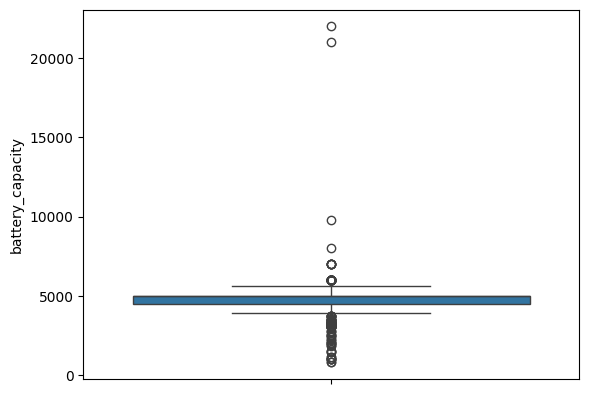

In [196]:
import seaborn as sns
sns.boxplot(df['battery_capacity'])

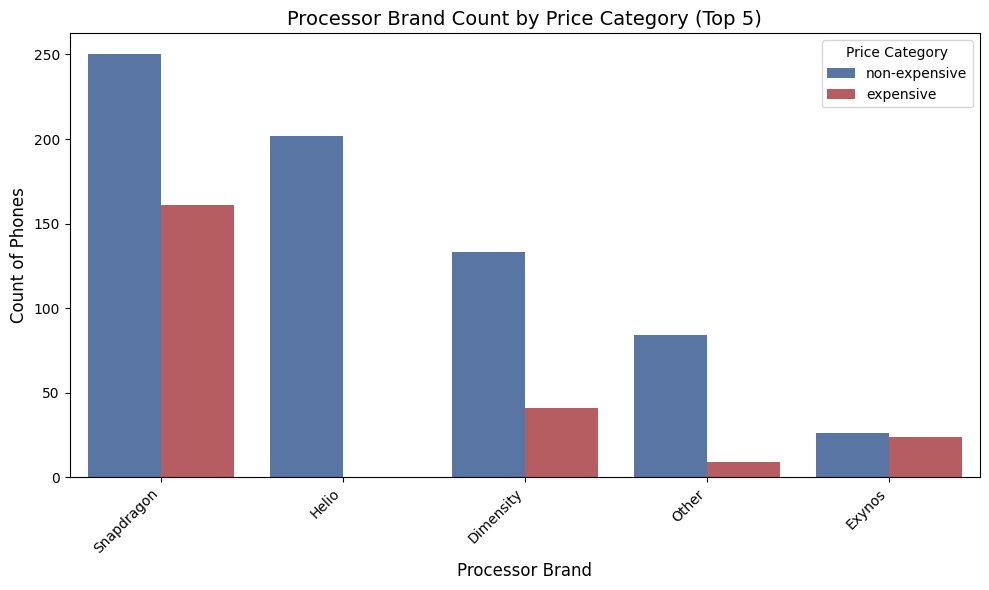

In [197]:
top_processor_brands = df['Processor_Brand'].value_counts().nlargest(5).index

df_filtered = df[df['Processor_Brand'].isin(top_processor_brands)]

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_filtered, 
    x='Processor_Brand', 
    hue='price', 
    order=top_processor_brands, 
    palette=['#4c72b0', '#c44e52']
)

plt.title('Processor Brand Count by Price Category (Top 5)', fontsize=14)
plt.xlabel('Processor Brand', fontsize=12)
plt.ylabel('Count of Phones', fontsize=12)
plt.legend(title='Price Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\hanae\AppData\Local\Temp\ipykernel_21784\3160139958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


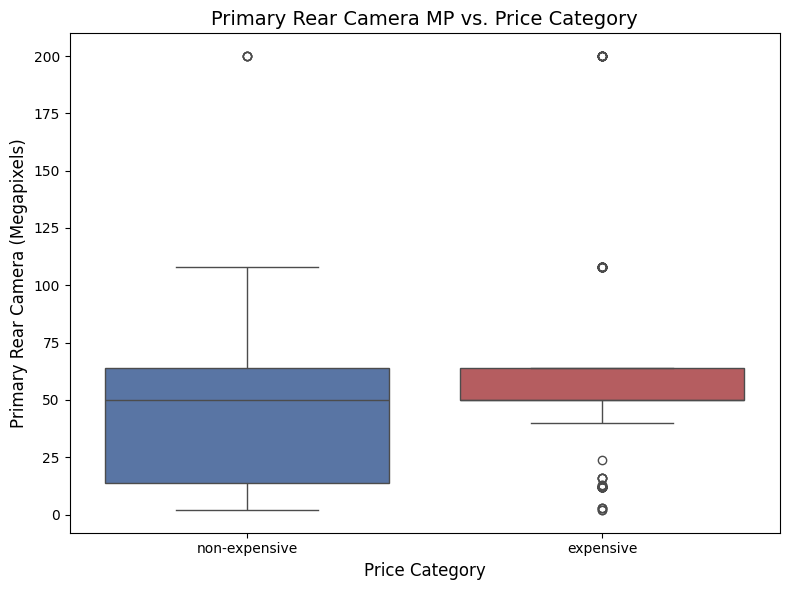

In [198]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='price', 
    y='primary_rear_camera_mp', 
    data=df, 
    palette=['#4c72b0', '#c44e52'] 
)

plt.title('Primary Rear Camera MP vs. Price Category', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Primary Rear Camera (Megapixels)', fontsize=12)
plt.tight_layout()



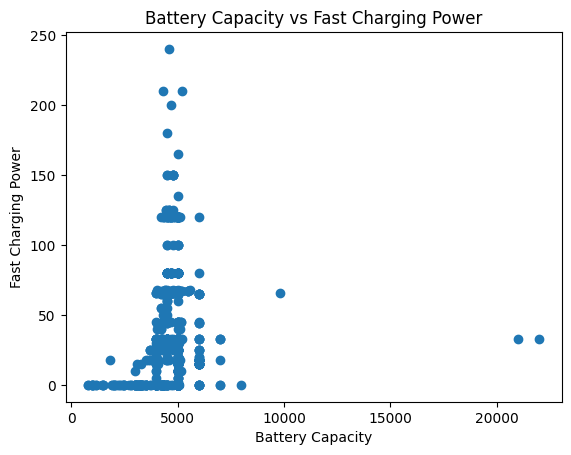

In [199]:
plt.scatter(df['battery_capacity'], df['fast_charging_power'])
plt.xlabel("Battery Capacity")
plt.ylabel("Fast Charging Power")
plt.title("Battery Capacity vs Fast Charging Power")
plt.show()

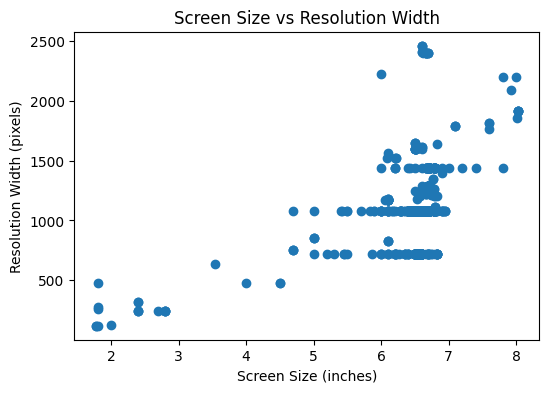

In [200]:
plt.figure(figsize=(6,4))
plt.scatter(df['Screen_Size'], df['Resolution_Width'])
plt.xlabel("Screen Size (inches)")
plt.ylabel("Resolution Width (pixels)")
plt.title("Screen Size vs Resolution Width")
plt.show()

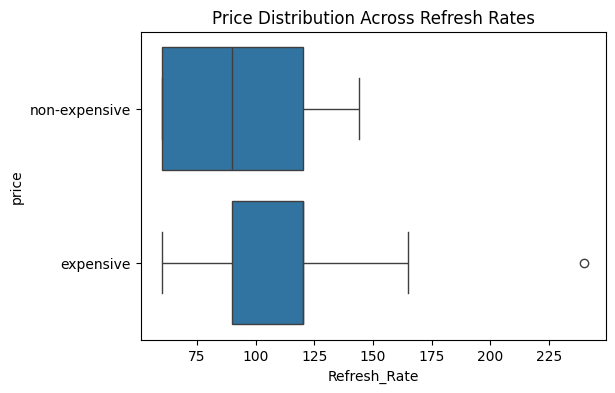

In [201]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Refresh_Rate', y='price', data=df)
plt.title("Price Distribution Across Refresh Rates")
plt.show()

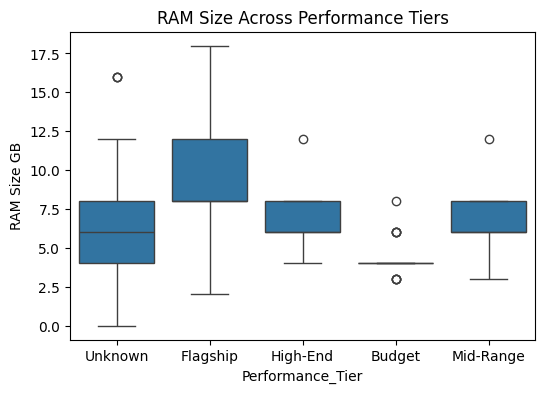

In [202]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Performance_Tier', y='RAM Size GB', data=df)
plt.title("RAM Size Across Performance Tiers")
plt.show()

In [203]:
numeric_cols = df[['battery_capacity', 'fast_charging_power']]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # outlier condition
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    print(f"{col}: {len(outliers)} outliers")

battery_capacity: 146 outliers
fast_charging_power: 13 outliers


In [204]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    print(f"{col}: {len(outliers)} outliers")


rating: 38 outliers
Core_Count: 78 outliers
Clock_Speed_GHz: 287 outliers


RAM Size GB: 11 outliers
Storage Size GB: 183 outliers
battery_capacity: 146 outliers
fast_charging_power: 13 outliers
Screen_Size: 120 outliers
Resolution_Width: 396 outliers
Resolution_Height: 19 outliers
Refresh_Rate: 1 outliers
primary_rear_camera_mp: 342 outliers
num_rear_cameras: 0 outliers
primary_front_camera_mp: 183 outliers
num_front_cameras: 90 outliers


In [205]:
numeric_cols = df[['battery_capacity', 'fast_charging_power']]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower=lower, upper=upper) 

In [206]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler(feature_range=(0, 1))

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df[numeric_cols].head())


     rating  Core_Count  Clock_Speed_GHz  RAM Size GB  Storage Size GB  \
0  0.758621         1.0         0.660377     0.444444            0.250   
1  0.793103         1.0         0.613208     0.444444            0.125   
2  1.000000         1.0         0.613208     0.444444            0.125   
3  0.724138         1.0         0.613208     0.333333            0.125   
4  0.758621         1.0         0.825472     0.333333            0.125   

   battery_capacity  fast_charging_power  Screen_Size  Resolution_Width  \
0             0.375             0.444444     0.739617          0.410256   
1             0.125             0.244444     0.746006          0.410256   
2             0.625             0.481481     0.787540          0.564103   
3             0.625             0.496296     0.782748          0.410256   
4             0.665             0.496296     0.771565          0.410256   

   Resolution_Height  Refresh_Rate  primary_rear_camera_mp  num_rear_cameras  \
0           0.608696    

In [207]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False))
    print("-"*40)


Column: price
price
non-expensive    726
expensive        284
Name: count, dtype: int64
----------------------------------------
Column: rating
rating
0.689655    187
0.827586     59
0.758621     58
0.793103     55
0.517241     52
0.862069     50
0.896552     46
0.655172     45
0.586207     37
0.620690     36
1.000000     35
0.724138     35
0.931034     33
0.551724     29
0.482759     29
0.965517     26
0.379310     20
0.413793     18
0.310345     17
0.448276     16
0.034483     15
0.206897     15
0.172414     14
0.344828     14
0.241379     13
0.275862     13
0.000000     12
0.068966     11
0.137931     10
0.103448     10
Name: count, dtype: int64
----------------------------------------
Column: Dual_Sim
Dual_Sim
Yes    988
No      22
Name: count, dtype: int64
----------------------------------------
Column: 4G
4G
Yes    989
No      21
Name: count, dtype: int64
----------------------------------------
Column: 5G
5G
Yes    544
No     466
Name: count, dtype: int64
----------------------

Clock_Speed_GHz
0.613208    400
0.518868    134
0.990566     94
0.566038     85
0.820755     36
0.448113     28
0.660377     23
0.330189     23
0.235849     20
1.000000     18
0.825472     18
0.707547     14
0.849057     13
0.943396     13
0.094340     11
0.339623     10
0.768868      9
0.801887      9
0.919811      8
0.594340      8
0.754717      5
0.731132      5
0.141509      5
0.188679      4
0.000000      3
0.877358      3
0.830189      3
0.957547      2
0.400943      1
0.589623      1
0.419811      1
0.471698      1
0.599057      1
0.047170      1
Name: count, dtype: int64
----------------------------------------
Column: Performance_Tier
Performance_Tier
Unknown      716
Flagship     131
Mid-Range     89
High-End      48
Budget        26
Name: count, dtype: int64
----------------------------------------
Column: RAM Size GB
RAM Size GB
0.444444    338
0.333333    258
0.222222    211
0.666667     84
0.166667     54
0.111111     32
0.888889      9
0.055556      8
0.027778      3
0.0

In [208]:
list1 = df["Performance_Tier"].unique()

In [209]:
print(list1)

['Unknown' 'Flagship' 'High-End' 'Budget' 'Mid-Range']


In [210]:
int((df["Performance_Tier"] == "Unknown").sum())

716

In [211]:
performance_tier_mapping = {
    'Budget': 1,
    'Mid-Range': 2,
    'High-End': 3,
    'Flagship': 4
}

df = df.copy()  
df['Performance_Tier_Encoded'] = df['Performance_Tier'].map(performance_tier_mapping)

In [212]:
df["Performance_Tier_Encoded"].value_counts(dropna=False)

Performance_Tier_Encoded
NaN    716
4.0    131
2.0     89
3.0     48
1.0     26
Name: count, dtype: int64

In [213]:
list1 = df["Processor_Brand"].unique()
print(list1)

['Dimensity' 'Snapdragon' 'Helio' 'Bionic' 'Other' 'Exynos'
 'Google Tensor' 'Unisoc' 'Kirin']


In [214]:
Processor_Brand_mapping = {
    'Dimensity': 1,
    'Snapdragon': 2,
    'Helio': 3,
    'Bionic': 4,
    'Exynos': 5,
    'Google Tensor':6,
    'Unisoc':7,
    'Kirin':8
}

df = df.copy()  
df['Processor_Brand_Encoded'] = df['Processor_Brand'].map(Processor_Brand_mapping)

In [215]:
df["Processor_Brand_Encoded"].value_counts(dropna=False)

Processor_Brand_Encoded
2.0    411
3.0    202
1.0    174
NaN     93
5.0     50
4.0     42
7.0     28
8.0      7
6.0      3
Name: count, dtype: int64

In [216]:
list1 = df["RAM Tier"].unique()
print(list1)

['High-End' 'Mid-Range' 'Flagship' 'Budget' 'Unknown']


In [217]:
RAM_Tier_mapping = {
    'High-End': 1,
    'Mid-Range': 2,
    'Flagship': 3,
    'Budget': 4,
}

df = df.copy()  
df['RAM_Tier_Encoded'] = df['RAM Tier'].map(RAM_Tier_mapping)

In [218]:
df["RAM_Tier_Encoded"].value_counts(dropna=False)

RAM_Tier_Encoded
2.0    445
1.0    338
4.0    108
3.0     95
NaN     24
Name: count, dtype: int64

In [219]:
list1 = df["Notch_Type"].unique()
print(list1)

['Punch Hole' 'Water Drop Notch' 'Large Notch' 'No Notch' 'Unknown'
 'Small Notch' 'Dual Punch Hole']


In [220]:
Notch_Type_mapping = {
    'Punch Hole': 1,
    'Water Drop Notch': 2,
    'Large Notch': 3,
    'No Notch':4,
    'Small Notch': 5,
    'Dual Punch Hole':6
}

df = df.copy()  
df['Notch_Type_Encoded'] = df['Notch_Type'].map(Notch_Type_mapping)

In [221]:
df["Notch_Type_Encoded"].value_counts(dropna=False)

Notch_Type_Encoded
1.0    528
2.0    308
4.0    102
NaN     28
5.0     25
3.0     13
6.0      6
Name: count, dtype: int64

In [222]:
Price_mapping = {
    'non-expensive':0,
    'expensive':1
}

df = df.copy()  
df['Price_Encoded'] = df['price'].map(Price_mapping)

In [223]:
df["Price_Encoded"].value_counts(dropna=False)

Price_Encoded
0    726
1    284
Name: count, dtype: int64

In [224]:
mapping = {
    'Yes': 1,
    'No': 0
}

df = df.copy()  
df['4G_Encoded'] = df['4G'].map(mapping)
df['Dual_Sim_Encoded']= df['Dual_Sim'].map(mapping)
df['5G_Encoded'] = df['5G'].map(mapping)
df['Vo5G_Encoded'] = df['Vo5G'].map(mapping)
df['NFC_Encoded'] = df['NFC'].map(mapping)
df['IR_Blaster_Encoded'] = df['IR_Blaster'].map(mapping)
df['memory_card_support_Encoded'] = df['memory_card_support'].map(mapping)

In [225]:
df["Dual_Sim_Encoded"].value_counts(dropna=False)

Dual_Sim_Encoded
1    988
0     22
Name: count, dtype: int64

In [226]:
list1 = df["os_name"].unique()
print(list1)

['Android' 'iOS' 'HarmonyOS' 'EMUI' 'Pragati OS' 'KAI OS' 'RTOS']


In [227]:
os_name_mapping = {
    'Android': 1,
    'iOS': 2,
    'HarmonyOS': 3,
    'EMUI': 4,
    'RTOS': 5,
    'Pragati OS': 6,
    'KAI OS': 7
}

df['os_name_Encoded'] = df['os_name'].map(os_name_mapping)

In [228]:
df["os_name_Encoded"].value_counts(dropna=False)

os_name_Encoded
1    967
2     33
3      4
4      2
5      2
6      1
7      1
Name: count, dtype: int64

In [229]:
df = df.drop(columns=['os_name','price','Notch_Type','RAM Tier','Processor_Brand','Performance_Tier'])


In [230]:
df = df.drop(columns=['4G','5G','Dual_Sim','Vo5G','NFC','IR_Blaster','memory_card_support'])

In [231]:
df['brand_cleaned'] = df['brand'].str.title()

In [232]:
list1 = df["brand_cleaned"].unique()
print(list1)

['Realme' 'Vivo' 'Poco' 'Xiaomi' 'Iqoo' 'Motorola' 'Apple' 'Oppo' 'Nubia'
 'Royole' 'Nokia' 'Sony' 'Honor' 'Samsung' 'Eunity' 'Huawei' 'Ikall'
 'Leitz' 'Jio' 'Infinix' 'Google' 'Realme Narzo' 'Tecno' 'Lyf' 'Blackview'
 'Oneplus' 'Oukitel' 'Itel' 'Motorola Edge' 'Karbonn' 'Micromax' 'Asus'
 'Gionee' 'Tcl' 'Zanco' 'Cat' 'Tesla' 'Blackzone' 'Dizo' 'Nothing'
 'Lenovo' 'Letv' 'Lg' 'Zte' 'Lava' 'Vertu' 'Redmi' 'Sharp' 'Namotel'
 'Doogee' 'Cola' 'Xtouch' 'Leeco' 'Duoqin' 'Blu']


In [233]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['brand_encoded_label'] = le.fit_transform(df['brand_cleaned'])

df = df.drop(columns=['brand_cleaned', 'brand'])

In [234]:
df["brand_encoded_label"].value_counts(dropna=False)

brand_encoded_label
43    135
51    132
50    111
36     87
39     80
0      45
38     41
29     41
35     41
47     33
17     32
16     29
32     28
40     17
14     16
12     14
13     13
18     13
30     12
45      9
1       7
34      6
19      5
33      5
26      4
21      4
15      4
25      3
37      3
10      3
28      3
27      3
41      3
11      3
42      2
24      2
8       2
54      2
23      1
7       1
3       1
48      1
5       1
53      1
46      1
2       1
20      1
49      1
44      1
31      1
6       1
52      1
22      1
9       1
4       1
Name: count, dtype: int64

In [235]:
list1 = df["os_version"].unique()
print(list1)

['v12' 'v11' 'v13' 'v15.0' 'v10' 'v7.1' 'v10.0' 'v16' 'v8.1' 'v13.0'
 'v5.1' 'v6.0' 'v15' 'v9' 'v8.0' 'v11.0' 'v9.0' 'v3.0' 'v5.1.1' 'v12.1'
 'v4.4.2' 'v2' 'v12.3' 'v2.0' 'v17' 'v4.0']


In [236]:
le = LabelEncoder()
df['os_version_label'] = le.fit_transform(df['os_version'])

df = df.drop(columns=['os_version'])

In [237]:
df["os_version_label"].value_counts(dropna=False)

os_version_label
4     563
2     231
0      58
7      48
25     27
1      21
11     14
23     10
9      10
22      4
3       4
20      3
10      3
19      2
8       1
21      1
24      1
18      1
15      1
5       1
17      1
13      1
6       1
14      1
12      1
16      1
Name: count, dtype: int64

In [238]:
print(df.columns)

Index(['rating', 'Processor_Series', 'Core_Count', 'Clock_Speed_GHz',
       'RAM Size GB', 'Storage Size GB', 'battery_capacity',
       'fast_charging_power', 'Screen_Size', 'Resolution_Width',
       'Resolution_Height', 'Refresh_Rate', 'primary_rear_camera_mp',
       'num_rear_cameras', 'primary_front_camera_mp', 'num_front_cameras',
       'memory_card_size', 'Performance_Tier_Encoded',
       'Processor_Brand_Encoded', 'RAM_Tier_Encoded', 'Notch_Type_Encoded',
       'Price_Encoded', '4G_Encoded', 'Dual_Sim_Encoded', '5G_Encoded',
       'Vo5G_Encoded', 'NFC_Encoded', 'IR_Blaster_Encoded',
       'memory_card_support_Encoded', 'os_name_Encoded', 'brand_encoded_label',
       'os_version_label'],
      dtype='object')


In [239]:
import pandas as pd
import numpy as np

def convert_to_gb(storage):
    if 'TB' in storage:
        return float(storage.replace('TB', '')) * 1000
    elif 'GB' in storage:
        return float(storage.replace('GB', ''))
    else:
        return np.nan

df['storage_gb'] = df['memory_card_size'].apply(convert_to_gb)

In [240]:
df = df.drop(columns=['memory_card_size'])

In [241]:
list1 = df["storage_gb"].unique()
print(list1)

[1000.  512.  256.   64.  128.   32. 2000.   48.   16.]


In [242]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


Column: rating
rating
0.689655    187
0.827586     59
0.758621     58
0.793103     55
0.517241     52
0.862069     50
0.896552     46
0.655172     45
0.586207     37
0.620690     36
1.000000     35
0.724138     35
0.931034     33
0.551724     29
0.482759     29
0.965517     26
0.379310     20
0.413793     18
0.310345     17
0.448276     16
0.034483     15
0.206897     15
0.172414     14
0.344828     14
0.241379     13
0.275862     13
0.000000     12
0.068966     11
0.137931     10
0.103448     10
Name: count, dtype: int64

Column: Processor_Series
Processor_Series
695     53
35      51
680     43
8       41
700     39
        ..
2000     1
782      1
7150     1
28       1
659      1
Name: count, Length: 121, dtype: int64

Column: Core_Count
Core_Count
1.000000    932
0.333333     39
0.666667     37
0.000000      2
Name: count, dtype: int64

Column: Clock_Speed_GHz
Clock_Speed_GHz
0.613208    400
0.518868    134
0.990566     94
0.566038     85
0.820755     36
0.448113     28
0.660377  

In [243]:
from sklearn.impute import KNNImputer
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols_with_nan = [col for col in numeric_cols if df[col].isna().any()]

imputer = KNNImputer(n_neighbors=5)
df[numeric_cols_with_nan] = imputer.fit_transform(df[numeric_cols_with_nan])


df[numeric_cols_with_nan] = np.floor(df[numeric_cols_with_nan] + 0.5).astype(int)

print(df[numeric_cols_with_nan].isna().sum())


Performance_Tier_Encoded    0
Processor_Brand_Encoded     0
RAM_Tier_Encoded            0
Notch_Type_Encoded          0
dtype: int64


In [244]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


Column: rating
rating
0.689655    187
0.827586     59
0.758621     58
0.793103     55
0.517241     52
0.862069     50
0.896552     46
0.655172     45
0.586207     37
0.620690     36
1.000000     35
0.724138     35
0.931034     33
0.551724     29
0.482759     29
0.965517     26
0.379310     20
0.413793     18
0.310345     17
0.448276     16
0.034483     15
0.206897     15
0.172414     14
0.344828     14
0.241379     13
0.275862     13
0.000000     12
0.068966     11
0.137931     10
0.103448     10
Name: count, dtype: int64

Column: Processor_Series
Processor_Series
695     53
35      51
680     43
8       41
700     39
        ..
2000     1
782      1
7150     1
28       1
659      1
Name: count, Length: 121, dtype: int64

Column: Core_Count
Core_Count
1.000000    932
0.333333     39
0.666667     37
0.000000      2
Name: count, dtype: int64

Column: Clock_Speed_GHz
Clock_Speed_GHz
0.613208    400
0.518868    134
0.990566     94
0.566038     85
0.820755     36
0.448113     28
0.660377  



Column: battery_capacity
battery_capacity
0.6250    514
0.3750     95
0.0000     77
1.0000     69
0.1250     42
0.4750     27
0.2750     24
0.5250     18
0.2250     13
0.6350     10
0.4250     10
0.3250      8
0.2400      7
0.6650      6
0.7050      5
0.6500      5
0.3850      4
0.2865      4
0.3010      4
0.8750      4
0.6750      4
0.1500      4
0.2500      3
0.2875      3
0.3500      3
0.5400      3
0.1350      3
0.1400      3
0.7250      3
0.6150      3
0.3000      3
0.1750      3
0.3300      2
0.4300      2
0.6265      2
0.2800      2
0.3025      1
0.3600      1
0.6575      1
0.1325      1
0.7150      1
0.5550      1
0.4900      1
0.9250      1
0.5300      1
0.4320      1
0.1650      1
0.4350      1
0.3910      1
0.5150      1
0.0750      1
0.3050      1
0.5600      1
0.5350      1
Name: count, dtype: int64

Column: fast_charging_power
fast_charging_power
0.000000    246
0.244444    152
0.133333    125
0.496296     65
0.185185     53
0.888889     46
0.111111     43
0.592593     

In [245]:
df_test_processed = df.iloc[:len(df_test), :].copy()
df_train_processed  = df.iloc[len(df_test):, :].copy()
print("test rows:", len(df_test_processed))
print("train rows:", len(df_train_processed))

test rows: 153
train rows: 857


In [246]:
df_test_processed.to_csv('test_processed.csv',index=False)
df_train_processed.to_csv('train_processed.csv' ,index=False)